In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import os
import warnings


warnings.filterwarnings("ignore")

os.environ["OMP_NUM_THREADS"] = "1"

In [84]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

initial_data = pd.read_csv('../data/cocktail_dataset.csv')
initial_data.set_index('id', inplace=True)

data = pd.read_csv('../data/cocktail_dataset_reduced.csv')
data.set_index('id', inplace=True)

# add name column back
data['name'] = initial_data['name']
data = data[['name'] + [col for col in data.columns if col != 'name']]

data.head()

,name,alcoholic,IBA,category_Cocktail,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Highball glass,glass_Old-fashioned glass,glass_Pousse cafe glass,glass_Whiskey Glass,glass_Whiskey sour glass,glass_White wine glass,ingredientInName,instructionsLength,tagsCount,ingredientsCount,gin
id,,,,,,,,,,,,,,,,,,,,
11000,Mojito,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0.509804,1.000000,0.75,0
11001,Old Fashioned,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0.568627,0.444444,0.50,0
11002,Long Island Tea,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.392157,0.666667,1.00,1
11003,Negroni,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,0.222222,0.25,1
11004,Whiskey Sour,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.294118,0.333333,0.50,0


### Exploratory Data Analysis (EDA)
In the file `EDA.ipynb`, I conducted an initial exploratory data analysis.

### Data Preparation (Preprocessing)
Next, in the file `Preprocessing.ipynb`, I prepared the data for clustering. I chose one-hot encoding for categorical data and scaled the rest of the data to the range [0, 1] using MinMaxScaler.

### Correlation Analysis (Further Analysis)
Before clustering, in the file `Further_analysis.ipynb`, I performed a correlation analysis to better understand the data after preprocessing and to remove redundancies identified from the correlation matrix.

### Clustering
Next, in the file `Clustering.ipynb`, I performed dimensionality reduction using PCA and conducted clustering using KMEANS and DBSCAN.

### Analysis Steps:
1. **EDA.ipynb** - Initial exploratory data analysis.
2. **Preprocessing.ipynb** - Data preparation for clustering:
   - One-hot encoding for categorical data.
   - Scaling the rest of the data to the range [0, 1] using MinMaxScaler.
3. **Further_analysis.ipynb** - Correlation analysis:
   - Removing redundancies identified from the correlation matrix analysis.
4. **Clustering.ipynb** - Clustering:
   - Dimensionality reduction using PCA.
   - Clustering using KMEANS and DBSCAN.

# Summary, Visualization, and Evaluation with Quantitative Metrics.

To find a balance between retained variance and the ability to visualize the data, I chose **PCA** for **3 components**, achieving only **52.59%** of the original variance. I did this consciously, choosing 3 components instead of 8, where the variance would be close to **90%**.

To explain, I presented the data in binary form for categorical data using **one-hot encoding**, and for numerical data, I used **MinMax normalization** to achieve a consistent range of **[0, 1]**.

The number of drinks in the database was not large (**134**) relative to their level of correlation.

As shown in the file **Clustering.ipynb**, when the data is presented in the range **[0, 1]**, where most of it is categorical, and the number of rows in the database is small, the optimal solution seems to be the number of **3 PCA components**.

**Why?**

Because the number of components seems to be correlated with the target number of clusters, which can be described by the formula
$$
k = 2^n
$$
where **n** is the number of components in PCA, and **k** is the number of clusters for **KMEANS**. So, prioritizing ease of visualization, I chose **3 dimensions [n]**. Opting for **90%** variance, I would have to choose approximately **2^8** clusters, which would be difficult to visualize.

Currently, the interpretation of the visualization of the **3-dimensional PCA feature space** is that certain primary features and noise from other primary features predominantly influence the components.

In summary, the resulting clusters can be described as the outcome of the relationship between 3 different features of the drinks, with noise resulting from the rest of the features.

Variance explaned by 3 componenets: 52.59%


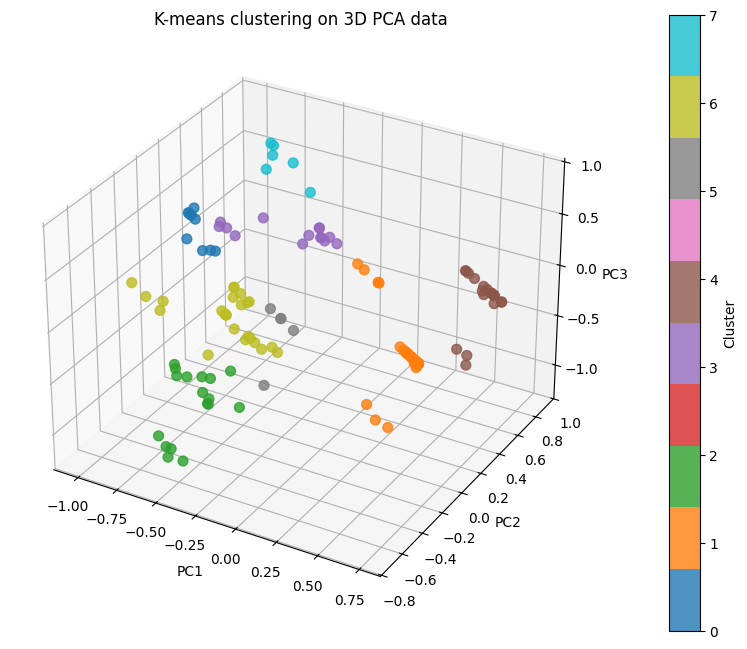

In [85]:
no_name_data = data.drop('name', axis=1)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(no_name_data)

explained_variance = pca.explained_variance_ratio_
explained_variance = np.sum(explained_variance)
print(f'Variance explaned by 3 componenets: {explained_variance * 100:.2f}%')

n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_pca)

data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(3)])
data_pca_df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_pca_df['PC1'], data_pca_df['PC2'], data_pca_df['PC3'],
                     c=data_pca_df['Cluster'], cmap='tab10', s=50, alpha=0.8)  

# Uncomment to show names
# for i, name in enumerate(data['name']):
#     ax.text(data_pca_df['PC1'][i], data_pca_df['PC2'][i], data_pca_df['PC3'][i], name, 
#             fontsize=6, color='gray', alpha=0.5)  

ax.set_title('K-means clustering on 3D PCA data')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')
plt.show()

<img id="gif" src="../final_clusters.gif" width="1000" />
<script>
  let frameIndex = 0;
  const totalFrames = 30; 
  const framePrefix = "frame_";
  const frameExtension = ".png"; 
  const frameDelay = 100; 

  function playGif() {
      frameIndex = (frameIndex + 1) % totalFrames;
      document.getElementById("gif").src = framePrefix + String(frameIndex).padStart(3, '0') + frameExtension;
  }


  setInterval(playGif, frameDelay);
</script>

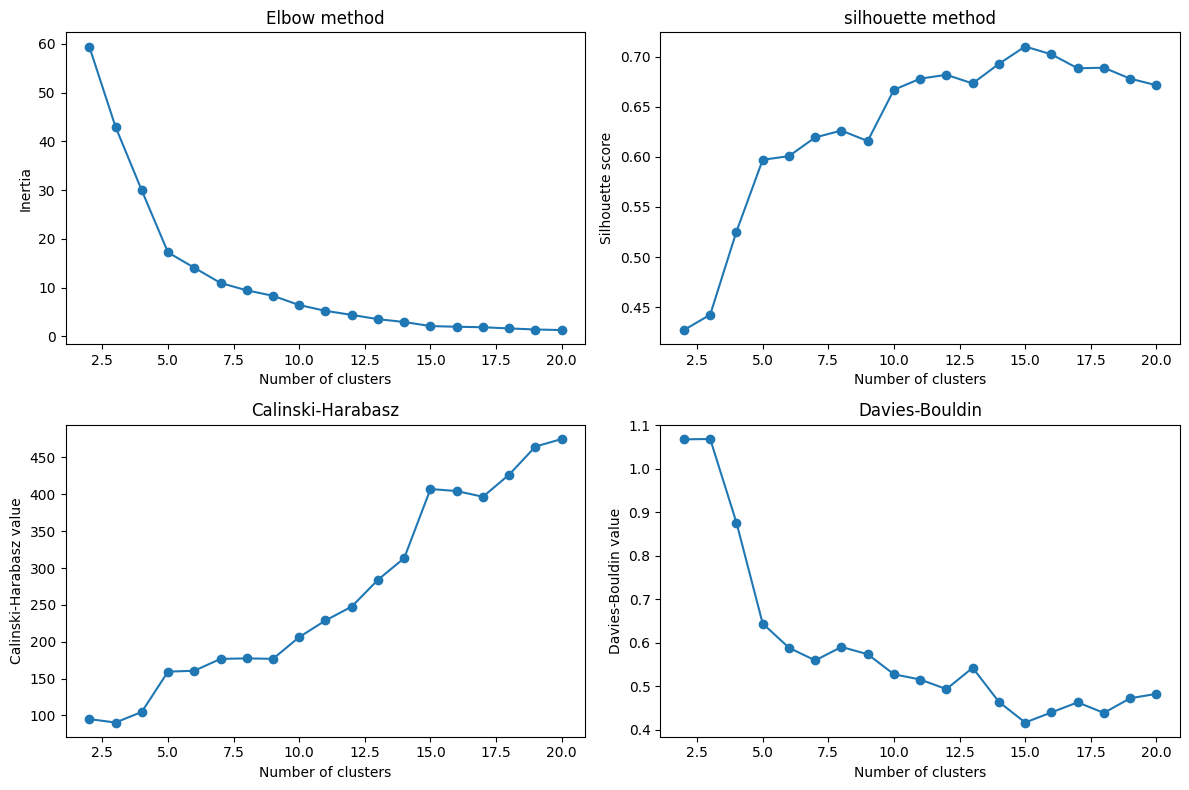

In [86]:
# elbow method - selection of the number of clusters
inertia = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_pca, kmeans.labels_))
    calinski_harabasz.append(calinski_harabasz_score(data_pca, kmeans.labels_))
    davies_bouldin.append(davies_bouldin_score(data_pca, kmeans.labels_))

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(range(2, 21), inertia, marker='o')
ax[0, 0].set_title('Elbow method')
ax[0, 0].set_xlabel('Number of clusters')
ax[0, 0].set_ylabel('Inertia')

ax[0, 1].plot(range(2, 21), silhouette, marker='o')
ax[0, 1].set_title('silhouette method')
ax[0, 1].set_xlabel('Number of clusters')
ax[0, 1].set_ylabel('Silhouette score')

ax[1, 0].plot(range(2, 21), calinski_harabasz, marker='o')
ax[1, 0].set_title('Calinski-Harabasz')
ax[1, 0].set_xlabel('Number of clusters')
ax[1, 0].set_ylabel('Calinski-Harabasz value')

ax[1, 1].plot(range(2, 21), davies_bouldin, marker='o')
ax[1, 1].set_title('Davies-Bouldin')
ax[1, 1].set_xlabel('Number of clusters')
ax[1, 1].set_ylabel('Davies-Bouldin value')

plt.tight_layout()
plt.show()

In [87]:
silhouette_score(data_pca_df, kmeans.labels_)

np.float64(0.6224813781419707)

In [88]:
calinski_harabasz_score(data_pca_df, kmeans.labels_)

np.float64(272.14518152522055)

In [89]:
davies_bouldin_score(data_pca_df, kmeans.labels_)

np.float64(0.7032660101111589)

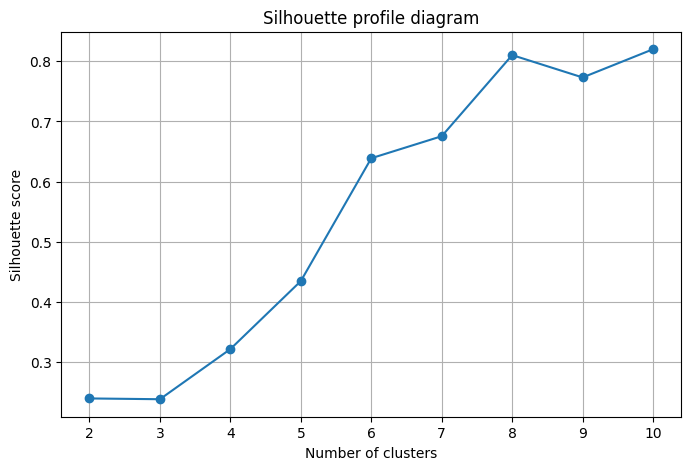

In [90]:
# silhouette profile diagram
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_pca)
    silhouette_scores.append(silhouette_score(data_pca_df, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette profile diagram')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

**Statistics**, such as **Silhouette Score** - close to 1, **Calinski-Harabasz** high, and **Davies-Bouldin** low, indicate that the clustering was successful. This is also confirmed by the visual evaluation.

The **Silhouette profile diagram** suggests that the theory \(2^n = k\) might be true, as for \(n = 3\), the Silhouette score is highest for 8 and 10.

Finally, I will present the division and description of the PCA components.

In [91]:
pc = pca.components_
explained_variance = pca.explained_variance_ratio_
pca_results = pd.DataFrame(pc, columns=no_name_data.columns)

for i in range(len(pc)):
    print(f'PC {i + 1}:')
    
    pc_df = pd.DataFrame({
        'Feature': pca_results.columns,
        'Value': pca_results.iloc[i].values * 100
    })
    
    pc_df = pc_df.sort_values(by='Value', ascending=False)

    for _, row in pc_df.iterrows():
        print(f'{row["Feature"]}: {row["Value"]:.2f}%')
        
    print(f'Explained variance: {explained_variance[i] * 100:.2f}%')

PC 1:
glass_Cocktail glass: 79.54%
category_Cocktail: 2.50%
glass_Brandy snifter: 0.04%
alcoholic: -0.00%
category_Punch / Party Drink: -0.31%
glass_Pousse cafe glass: -0.96%
glass_White wine glass: -1.01%
glass_Whiskey Glass: -1.02%
glass_Champagne flute: -3.98%
tagsCount: -4.10%
IBA: -6.69%
glass_Collins glass: -7.98%
gin: -9.12%
glass_Whiskey sour glass: -11.62%
instructionsLength: -14.09%
glass_Highball glass: -19.71%
ingredientsCount: -23.16%
glass_Old-fashioned glass: -33.00%
ingredientInName: -33.05%
Explained variance: 24.13%
PC 2:
gin: 93.73%
glass_Highball glass: 17.74%
glass_Cocktail glass: 14.18%
ingredientsCount: 9.62%
ingredientInName: 7.55%
instructionsLength: 5.68%
category_Cocktail: 2.84%
glass_White wine glass: 2.01%
glass_Whiskey sour glass: 1.26%
alcoholic: 0.00%
glass_Whiskey Glass: -0.97%
glass_Brandy snifter: -1.39%
category_Punch / Party Drink: -1.75%
glass_Pousse cafe glass: -2.44%
tagsCount: -3.62%
glass_Collins glass: -6.86%
glass_Champagne flute: -8.39%
glas

This indicates that:

- **PCA1** corresponds to `glass_Cocktail glass`: **79.54%**
- **PCA2** corresponds to `gin`: **93.73%**
- **PCA3** corresponds to `ingredientInName`: **60.20%**

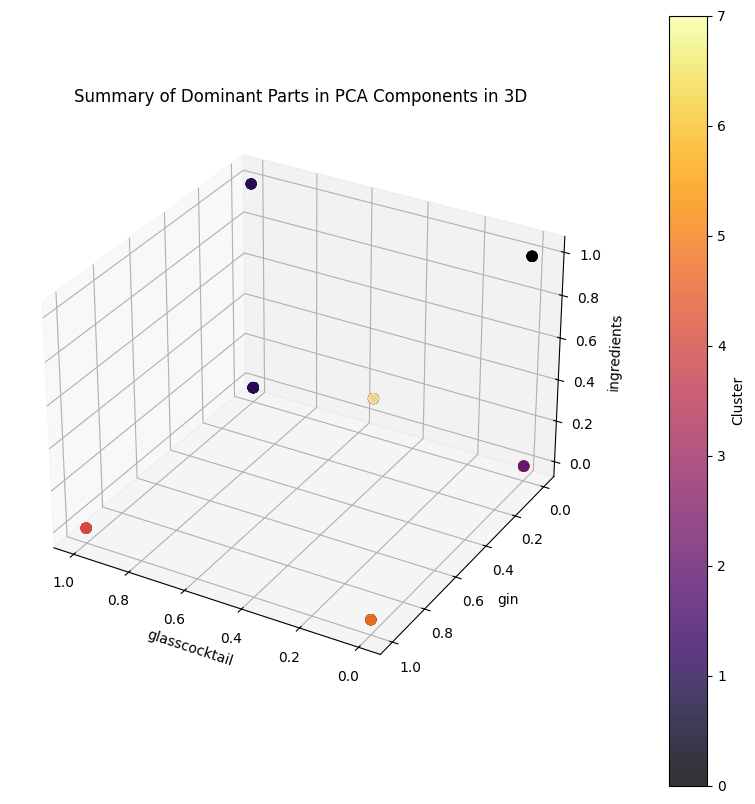

In [92]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['glass_Cocktail glass'], data['gin'], data['ingredientInName'],
                        c=data_pca_df['Cluster'], cmap='inferno', s=50, alpha=0.8)

ax.set_title('Summary of Dominant Parts in PCA Components in 3D')
ax.set_xlabel('glasscocktail')
ax.set_ylabel('gin')
ax.set_zlabel('ingredients')

ax.view_init(elev=30, azim=120)
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

plt.show()


<img id="gif" src="../final_clusters.gif" width="1000" />
<script>
  let frameIndex = 0;
  const totalFrames = 30; 
  const framePrefix = "frame_";
  const frameExtension = ".png"; 
  const frameDelay = 100; 

  function playGif() {
      frameIndex = (frameIndex + 1) % totalFrames;
      document.getElementById("gif").src = framePrefix + String(frameIndex).padStart(3, '0') + frameExtension;
  }


  setInterval(playGif, frameDelay);
</script>